In [272]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Экспоненциальное распределение
__[Статья на wiki](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)__

Экспоненциальное (или показательное) распределение — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.
Случайная величина $X$ имеет экспоненциальное распределение с параметром $\lambda>0$, если её плотность имеет вид:

$$ f_X(x) =
  \begin{cases}
    \lambda e ^ {-\lambda x}       & \quad x \geq 0\\
    0  & \quad x < 0
  \end{cases}
$$

Пусть есть магазин, в который время от времени заходят покупатели. При определённых допущениях время между появлениями двух последовательных покупателей будет случайной величиной с экспоненциальным распределением. Среднее время ожидания нового покупателя (см. ниже) равно $\lambda$. Сам параметр $\lambda$  тогда может быть интерпретирован как среднее число новых покупателей за единицу времени.

Можно предполагать, что плотность экспоненциальной случайной величины $X$ задана первым уравнением, и писать: $X \sim Exp (\lambda )$. Для экспоненциального распределения известно:
$$E[X] = \frac{1}{\lambda}, D[X] = \frac{1}{\lambda^2}$$

Сгенерируем выборку по экспоненциальному распределению размера 1000 и построим нужные отображения:

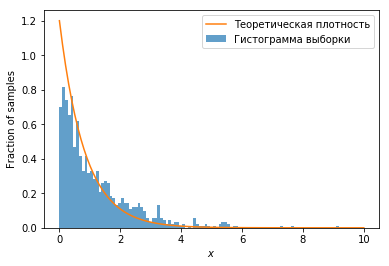

In [359]:
#определим распределение, по которому строится выборка, задав его плотность
def fexpon(lamb, x):
    return lamb * np.exp(-1*lamb*x)
#зададим начальные значения
lamb = 1.2
n = 1000
#сгенерируем выборку размера n с параметром lamb
sample = np.random.exponential(lamb, n)
x = np.linspace(0, 10, 100)
y = fexpon(lamb, x)

#рисуем
%matplotlib inline

plt.hist(sample, bins=100, density=True, alpha = 0.7, label='Гистограмма выборки')
plt.plot(x, y, label='Теоретическая плотность')
plt.ylabel('Fraction of samples')
plt.xlabel('$x$')
plt.legend()

Посмотрим, как выглядят гистограммы средних по выборкам и теоретические плотности распределения. Исходя из ЦПТ: 

$$\bar{Xn} \sim N(E[X], \frac{D[X]}{n}) \sim N(\frac{1}{\lambda}, \frac{1}{n \lambda^2})$$

Сгенерируем наборы средних по выборкам соответствующих размеров:

In [360]:
N = [5, 10, 25, 100, 1000] # размеры выборок
Dataset = [np.array([np.mean(x) for x in [np.random.exponential(lamb, j) for i in range(n)]]) for j in N]

Введем функцию плотности нормального распределения:

In [361]:
def normal(x, Ex, Dx):
    return np.exp(- (x - Ex) ** 2. / (2. * Dx)) / np.sqrt(2 * np.pi * Dx)

### N = 5

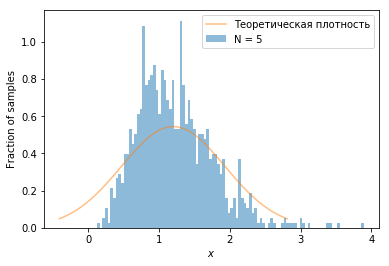

In [362]:
n = N[0]
EXn = lamb # берем не 1/lamb а lamb, см. комментарий в выводе
DXn = lamb ** 2 / n 
x = np.linspace(EXn - 3*np.sqrt(DXn), EXn + 3*np.sqrt(DXn), 100)
plt.hist(Dataset[N.index(n)], density=True, bins=100, alpha=0.5, label='N = 5')
plt.plot(x, normal(x, EXn, np.sqrt(DXn)), alpha=0.5, label='Теоретическая плотность')
plt.ylabel('Fraction of samples')
plt.xlabel('$x$')
plt.legend()

### N = 10

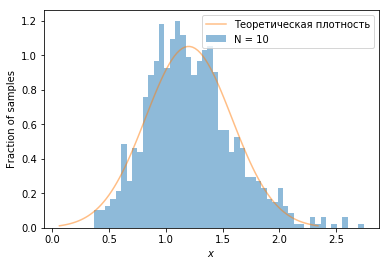

In [342]:
n = N[1]
EXn = lamb
DXn = lamb ** 2 / n 
norm = sts.norm(loc=EXn, scale=DXn)
x = np.linspace(EXn - 3*np.sqrt(DXn), EXn + 3*np.sqrt(DXn), 100)
plt.hist(Dataset[N.index(n)], density=True, bins=50, alpha=0.5, label='N = 10')
plt.plot(x, normal(x, EXn, DXn), alpha=0.5, label='Теоретическая плотность')
plt.ylabel('Fraction of samples')
plt.xlabel('$x$')
plt.legend()

### N = 25

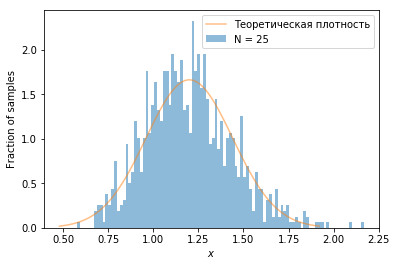

In [343]:
n = N[2]
EXn = lamb
DXn = lamb ** 2/n
norm = sts.norm(loc=EXn, scale=DXn)
x = np.linspace(EXn - 3*np.sqrt(DXn), EXn + 3*np.sqrt(DXn), 100)
plt.hist(Dataset[N.index(n)], density=True, bins=100, alpha=0.5, label='N = 25')
plt.plot(x, normal(x, EXn, DXn), alpha=0.5, label='Теоретическая плотность')
plt.ylabel('Fraction of samples')
plt.xlabel('$x$')
plt.legend()

### N = 100

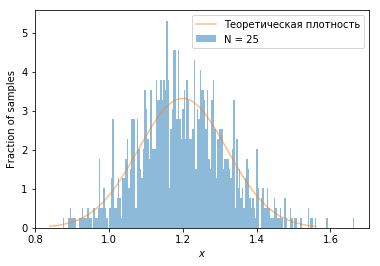

In [349]:
n = N[3]
EXn = lamb
DXn = lamb ** 2 / n
norm = sts.norm(loc=EXn, scale=DXn)
x = np.linspace(EXn - 3*np.sqrt(DXn), EXn + 3*np.sqrt(DXn), 100)
plt.hist(Dataset[N.index(n)], density=True, bins=200, alpha=0.5, label='N = 25')
plt.plot(x, normal(x, EXn, DXn), alpha=0.5, label='Теоретическая плотность')
plt.ylabel('Fraction of samples')
plt.xlabel('$x$')
plt.legend()

### N = 1000

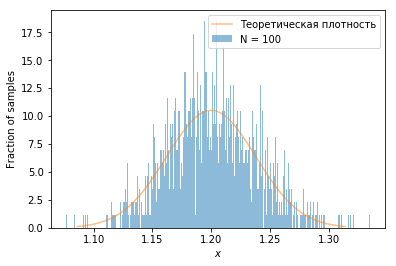

In [350]:
n = N[4]
EXn = lamb
DXn = lamb ** 2 / n
norm = sts.norm(loc=EXn, scale=DXn)
x = np.linspace(EXn - 3*np.sqrt(DXn), EXn + 3*np.sqrt(DXn), 100)
plt.hist(Dataset[N.index(n)], density=True, bins=300, alpha=0.5, label='N = 100')
plt.plot(x, normal(x, EXn, DXn), alpha=0.5, label='Теоретическая плотность')
plt.ylabel('Fraction of samples')
plt.xlabel('$x$')
plt.legend()

### А теперь все вместе

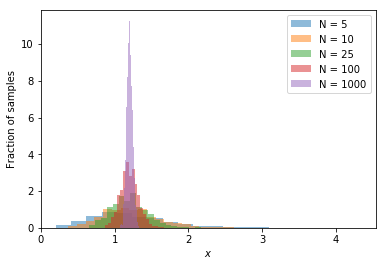

In [355]:
#нарисуем гистограммы средних по выборкам
plt.hist(Dataset[0], bins=20, density=True, alpha=0.5, label='N = 5')
plt.hist(Dataset[1], bins=20, density=True, alpha=0.5, label='N = 10')
plt.hist(Dataset[2], bins=20, density=True, alpha=0.5, label='N = 25')
plt.hist(Dataset[3], bins=20, density=True, alpha=0.5, label='N = 100')
plt.hist(Dataset[4], bins=20, density=True, alpha=0.5, label='N = 1000')
plt.ylabel('Fraction of samples')
plt.xlabel('$x$')
plt.legend()

### Вывод
Можно обратить внимание на следующие тенденции:
1. Чем N больше, тем больше гистограмма похожа на нормальное распределение 
2. Чем N больше, тем меньше дисперсия (что сходится с теоретическим значением для дисперсии экспоненциальной функции)

При реализации ЦПТ на экспоненциальном распределении, обнаружена следующая особенность:
параметр lamb, который в функциях экспоненциального распределении в Numpy и Scipy представляет собой обратную к лямбда величину.
Поэтому для теоретических значений матожидания и дисперсии экспоненциального распределения нужно использовать 1/lamb вместо lamb.